In [1]:
# import or define evaluate_classification, plot_decision_boundary, plot_data

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline

In [2]:
def load_dataset(filename, data_columns, target_column):
    """Load dataset from CSV file.

    Args:
        filename (str): Path to CSV file.
        data_columns (list): List of column names for data.
        target_column (str): Name of target column.

    Returns:
        tuple: Tuple containing data and target.
    """
    
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X.values, y.values

In [3]:
def evaluate_classification(y_true, y_pred, labels = None):
    """    
    Evaluate classification model performance.   
    Args:

        y_true (array): Ground truth values.        
        y_pred (array): Predicted values.        
        labels (list): List of labels to index the matrix.   

    Returns:        

        accuracy (float): Accuracy score.        
        report (pd.DataFrame): Classification report.        
        confusion_matrix (pd.DataFrame): Confusion matrix.    
    """    
    
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    confusion = pd.DataFrame(confusion_matrix(y_true, y_pred), labels, labels)
    return accuracy, report, confusion

In [4]:
def plot_decision_boundary(model, X, y, transform=None):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]

    if transform:
        grid = transform.transform(grid)

    pred_func = model.predict_proba(grid)[:,0]
    z = pred_func.reshape(xx.shape)
    c = plt.contourf(xx, yy, z, cmap="RdYlGn")
    plt.colorbar(c)
    colors = list(mcolors.TABLEAU_COLORS.keys())
    color_values = [colors[int(label)] for label in y]
    plt.scatter(X[:, 0], X[:, 1], marker="x", c=color_values)

In [5]:
class LogisticRegression:
    """Logistic Regression Classifier."""
    def __init__(self, standardize=True, 
                 learning_rate=0.01, 
                 max_iter=1000,
                 tol=1e-4,
                 verbose=False):
        """Initialize Logistic Regression Classifier.
        
        Args:
            standardize (bool): Whether to standardize the data.
            learning_rate (float): Learning rate for gradient descent.
            max_iter (int): Maximum number of iterations for gradient descent.
            tol (float): Tolerance for gradient descent.
            verbose (bool): Whether to print cost at each 100th iteration.
        """
        self.standardize = standardize
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def normalize(self, X):
        """Normalize the data.
        
        Args:
            X (array): Data to normalize.
        
        Returns:
            tuple: Tuple containing normalized data, mean, and standard deviation.
        """
        # TODO: Implement
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        X_new = (X - mean) / std
        return X_new, mean, std


    def add_intercept(self, X):
        """Add intercept term to the data.
        
        Args:
            X (array): Data to add intercept term.
        
        Returns:
            array: Data with intercept term."""
        m = X.shape[0]
        ones = np.ones((m, 1))
        X_new = np.column_stack((ones, X))
        return X_new

    def sigmoid(self, z):
        """Sigmoid function.
        
        Args:
            z (array): Input to sigmoid function.
            
        Returns:
            array: Output of sigmoid function."""
        # TODO: Implement
        h = 1 / (1 + np.exp(-z))
        return h
    
    def hypothesis(self, X, theta):
        """Hypothesis function.
        
        Args:
            X (array): Data.
            theta (array): Parameters.
        
        Returns:
            array: Output of hypothesis function."""
        # TODO: Implement
        z = np.dot(X, theta)
        return self.sigmoid(z)

    def cost_function(self, X, y, theta):
        """Cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            float: Cost of hypothesis function."""
        # TODO: Implement
        A = self.hypothesis(X, theta)
        m = X.shape[0]
        cost = 1 / m * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
        return cost

    def gradient(self, X, y, theta):
        """Gradient of cost function.
        
        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
            
        Returns:
            array: Gradient of cost function."""
        # TODO: Implement
        A = self.hypothesis(X, theta)
        grad = 1 / X.shape[0] * np.dot(X.T, (A - y))
        return grad

    def gradient_descent(self, X, y, theta):
        """Gradient descent algorithm.

        Args:
            X (array): Data.
            y (array): Target.
            theta (array): Parameters.
        
        Returns:
            tuple: Tuple containing parameters and costs."""
        costs = []
        J = self.cost_function(X, y, theta)
        costs.append(J)

        if self.verbose:
            print(f"Iteration 0 Cost: {J}")

        for i in range(1, self.max_iter + 1):
            # TODO: Implement
            grad = self.gradient(X, y, theta)
            theta = theta - self.learning_rate * grad
            cost = self.cost_function(X, y, theta)
            
            costs.append(cost)

            if i % 500 == 0 and self.verbose:
                print(f"Iteration {i} Cost: {cost}")

            if np.abs(costs[i] - costs[i - 1]) < self.tol:
                print(f"Converged at iteration {i}")
                break

        return theta, costs
    
    def fit(self, X, y):
        """Fit the model.

        Args:
            X (array): Data.
            y (array): Target."""
        if self.standardize:
            X_new, self.mean, self.std = self.normalize(X)
            X_new = self.add_intercept(X_new)
        else:
            X_new = self.add_intercept(X)
        #X_new = self.add_intercept(X_new)

        self.theta = np.zeros(X_new.shape[1])
        self.theta, self.costs = self.gradient_descent(X_new, y, self.theta)

    def predict(self, X):
        """Predict the target.

        Args:
            X (array): Data.

        Returns:
            array: Predicted target."""
        # TODO: Implement
        if self.standardize:
            X_new = (X - self.mean) / self.std
            X_new = self.add_intercept(X_new)
        else:
            X_new = self.add_intercept(X)

        y_pred = self.hypothesis(X_new, self.theta)
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        return y_pred

    def predict_proba(self, X):
        """Predict the probability of target.
        
        Args:
            X (array): Data.
        
        Returns:
            array: Predicted probability of target."""
        # TODO: Implement
        if self.standardize:
            X_new = (X - self.mean) / self.std
            X_new = self.add_intercept(X_new)
        else:
            X_new = self.add_intercept(X)

        h = self.hypothesis(X_new, self.theta)
        return np.column_stack((1-h, h))

In [6]:
def plot_data(X, y):
    """Plot data.
    
    Args:
        X (array): Data.
        y (array): Target."""
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class 1")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

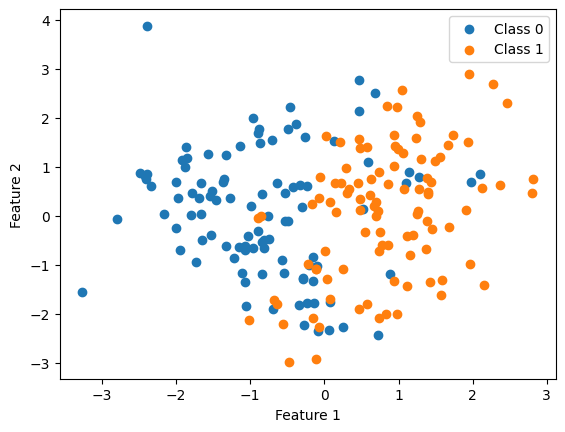

In [7]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.9)
plot_data(X, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=3000, tol=1e-6, verbose=True)

In [10]:
lr.fit(X_train, y_train)

Iteration 0 Cost: 0.6931471805599454
Iteration 500 Cost: 0.4646680810514283
Iteration 1000 Cost: 0.4214314031232711
Iteration 1500 Cost: 0.40610996918584824
Iteration 2000 Cost: 0.399151525338675
Iteration 2500 Cost: 0.3955672782068093
Iteration 3000 Cost: 0.3935775621540447


In [11]:
y_test_pred = lr.predict(X_test)

Accuracy: 
0.825
Report: 
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        22
           1       0.76      0.89      0.82        18

    accuracy                           0.82        40
   macro avg       0.83      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40

Confusion: 
    0   1
0  17   5
1   2  16


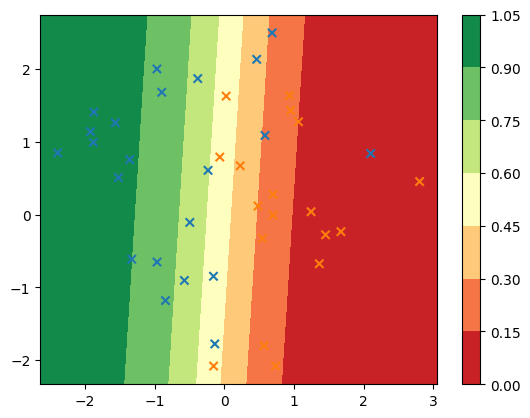

In [12]:
accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

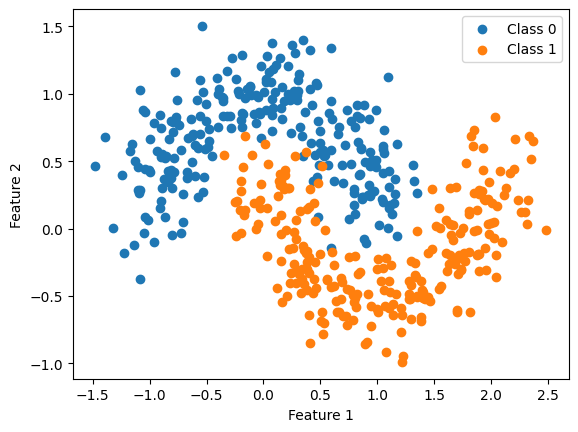

In [13]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
plot_data(X, y)

Iteration 0 Cost: 0.6931471805599452
Iteration 500 Cost: 0.3623983476607546
Converged at iteration 686
Accuracy: 
0.87
Report: 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        43
           1       0.94      0.82      0.88        57

    accuracy                           0.87       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.87      0.87       100

Confusion: 
    0   1
0  40   3
1  10  47


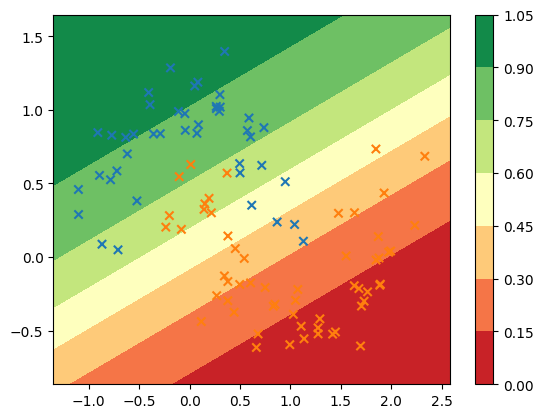

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=1000, tol=1e-4, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test)
plt.show()

Iteration 0 Cost: 0.6931471805599452
Iteration 500 Cost: 0.3087457461540807
Iteration 1000 Cost: 0.27446954558156816
Iteration 1500 Cost: 0.2584890909129931
Iteration 2000 Cost: 0.24801795424091766
Iteration 2500 Cost: 0.24008276700653305
Iteration 3000 Cost: 0.2336033828220581
Accuracy: 
0.88
Report: 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        43
           1       0.96      0.82      0.89        57

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100

Confusion: 
    0   1
0  41   2
1  10  47


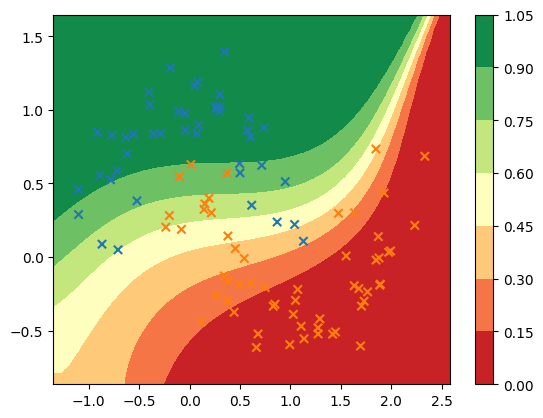

In [15]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=3000, tol=1e-6, verbose=True)
lr.fit(X_train_poly, y_train)
y_test_pred = lr.predict(X_test_poly)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X_test, y_test, poly)
plt.show()

Evaluate the above LogisticRegression class on datasets sats.csv and tests.csv. Consider using polynomial features when applicable.

In [16]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_dataset('sats.csv', data_columns, target_column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

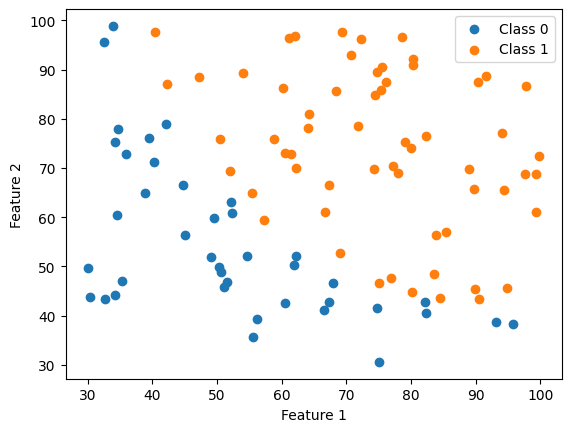

In [17]:
plot_data(X, y)

Iteration 0 Cost: 0.6931471805599454
Iteration 500 Cost: 0.3718465249133423
Iteration 1000 Cost: 0.2969809694420291
Iteration 1500 Cost: 0.26309939708354063
Iteration 2000 Cost: 0.2433055779854303
Iteration 2500 Cost: 0.23014506503955015
Iteration 3000 Cost: 0.22068825226233213
Accuracy: 
0.8
Report: 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion: 
   0  1
0  7  1
1  3  9


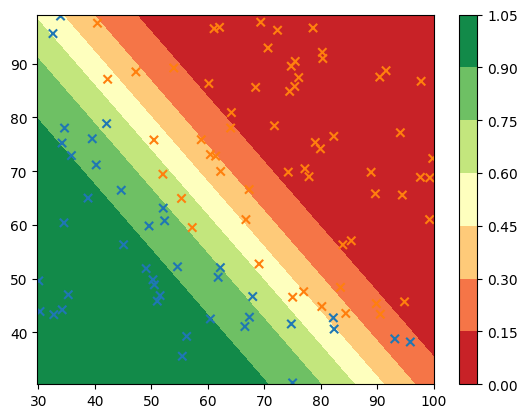

In [18]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=3000, tol=1e-6, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X, y)
plt.show()

Iteration 0 Cost: 0.6931471805599454
Iteration 500 Cost: 0.2691332673037453
Iteration 1000 Cost: 0.23305026445870825
Iteration 1500 Cost: 0.21443648094535264
Iteration 2000 Cost: 0.20238301630259703
Iteration 2500 Cost: 0.19364451966352628
Iteration 3000 Cost: 0.18683101562727078
Accuracy: 
0.8
Report: 
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20

Confusion: 
   0  1
0  7  1
1  3  9


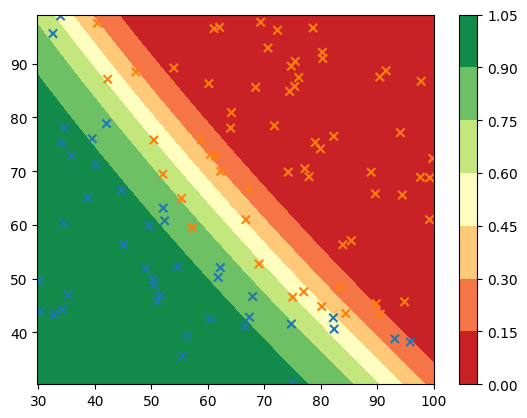

In [19]:
# add polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=3000, tol=1e-6, verbose=True)
lr.fit(X_train_poly, y_train)

y_test_pred = lr.predict(X_test_poly)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X, y, poly)
plt.show()

In [20]:
data_columns = ["test1", "test2"]
target_column = "passed"
X, y = load_dataset('tests.csv', data_columns, target_column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

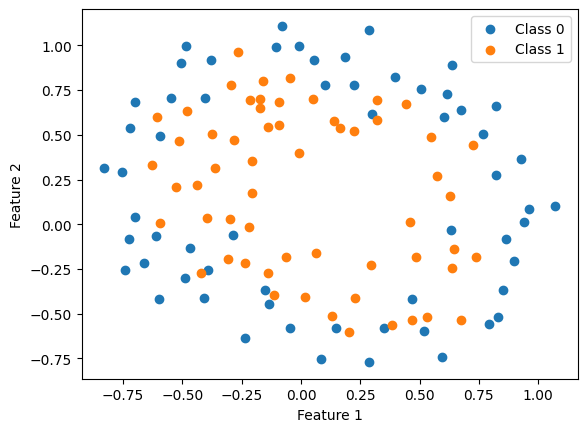

In [21]:
plot_data(X, y)

Iteration 0 Cost: 0.6931471805599454
Iteration 500 Cost: 0.6848645809085393
Converged at iteration 732
Accuracy: 
0.4166666666666667
Report: 
              precision    recall  f1-score   support

           0       0.40      0.33      0.36        12
           1       0.43      0.50      0.46        12

    accuracy                           0.42        24
   macro avg       0.41      0.42      0.41        24
weighted avg       0.41      0.42      0.41        24

Confusion: 
   0  1
0  4  8
1  6  6


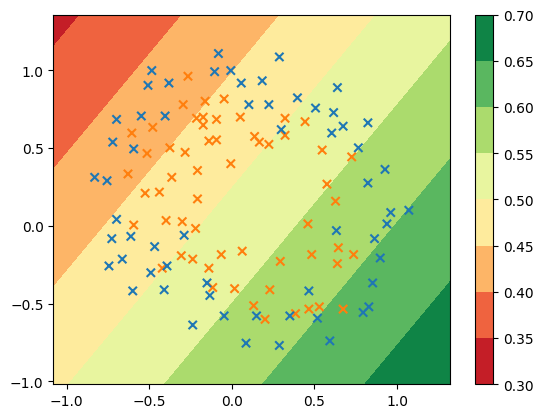

In [22]:
lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=3000, tol=1e-6, verbose=True)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X, y)
plt.show()

Iteration 0 Cost: 0.6931471805599454
Iteration 500 Cost: 0.5519359254964304
Iteration 1000 Cost: 0.49354474731628434
Iteration 1500 Cost: 0.4587087851119944
Iteration 2000 Cost: 0.4355771416922444
Iteration 2500 Cost: 0.41924011304225905
Iteration 3000 Cost: 0.40719132509108036
Accuracy: 
0.7916666666666666
Report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.82      0.75      0.78        12

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24

Confusion: 
    0  1
0  10  2
1   3  9


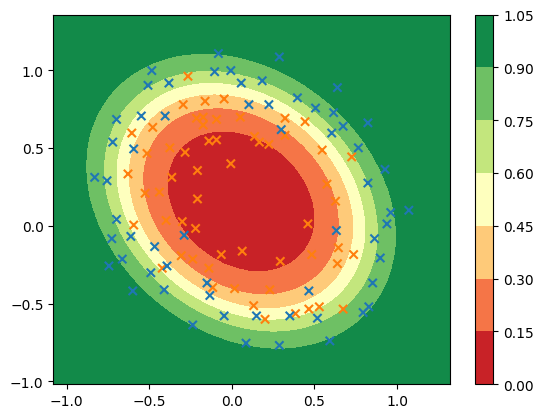

In [23]:
# add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LogisticRegression(standardize=True, learning_rate=0.01, max_iter=3000, tol=1e-6, verbose=True)
lr.fit(X_train_poly, y_train)

y_test_pred = lr.predict(X_test_poly)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(lr, X, y, poly)
plt.show()